In [1]:
!wget -nc https://lazyprogrammer.me/course_files/SPY.csv
!wget -nc https://lazyprogrammer.me/course_files/sp500sub.csv

--2021-06-20 21:05:09--  https://lazyprogrammer.me/course_files/SPY.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 251935 (246K) [text/csv]
Saving to: 'SPY.csv'

     0K .......... .......... .......... .......... .......... 20%  740K 0s
    50K .......... .......... .......... .......... .......... 40%  711K 0s
   100K .......... .......... .......... .......... .......... 60% 25.3M 0s
   150K .......... .......... .......... .......... .......... 81% 26.1M 0s
   200K .......... .......... .......... .......... ......    100% 5.03M=0.2s

2021-06-20 21:05:10 (1.59 MB/s) - 'SPY.csv' saved [251935/251935]

File 'sp500sub.csv' already there; not retrieving.



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
spy = pd.read_csv('SPY.csv', index_col=0, parse_dates=True)
spy.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,92.246048,118944600
2010-01-05,113.260002,113.680000,112.849998,113.629997,92.490204,111579900
2010-01-06,113.519997,113.989998,113.430000,113.709999,92.555328,116074400
2010-01-07,113.500000,114.330002,113.180000,114.190002,92.946060,131091100
2010-01-08,113.889999,114.620003,113.660004,114.570000,93.255348,126402800


In [4]:
spy['SPY'] = spy['Close'].pct_change(1)

In [5]:
index = pd.read_csv('sp500sub.csv', index_col=0, parse_dates=True)

In [6]:
aapl = index[index['Name'] == 'AAPL'].copy()

In [7]:
aapl.head()

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2010-01-04,30.490000,30.642857,30.340000,30.572857,26.466835,123432400.0,AAPL
2010-01-05,30.657143,30.798571,30.464285,30.625713,26.512596,150476200.0,AAPL
2010-01-06,30.625713,30.747143,30.107143,30.138571,26.090879,138040000.0,AAPL
2010-01-07,30.250000,30.285715,29.864286,30.082857,26.042646,119282800.0,AAPL
2010-01-08,30.042856,30.285715,29.865715,30.282858,26.215786,111902700.0,AAPL


In [8]:
aapl['AAPL'] = aapl['Close'].pct_change(1)

In [9]:
joined = aapl[['AAPL']].join(spy['SPY'])

In [10]:
joined.head()

,AAPL,SPY
Date,,
2010-01-04,NaN,NaN
2010-01-05,0.001729,0.002647
2010-01-06,-0.015906,0.000704
2010-01-07,-0.001849,0.004221
2010-01-08,0.006648,0.003328


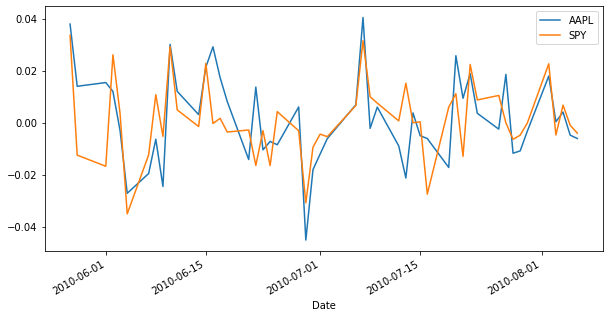

In [11]:
joined.iloc[100:150].plot(figsize=(10, 5));

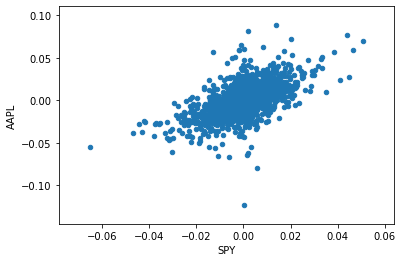

In [12]:
joined.plot.scatter('SPY', 'AAPL')

In [13]:
# make the dataset
joined.dropna(inplace=True)
X = joined[['SPY']].to_numpy()
Y = joined[['AAPL']].to_numpy()

In [14]:
X.shape, Y.shape

((2262, 1), (2262, 1))

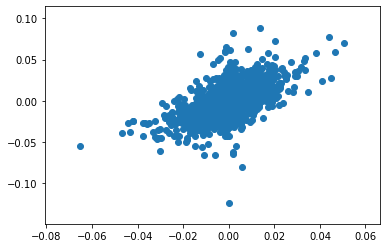

In [15]:
plt.scatter(X, Y);

In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

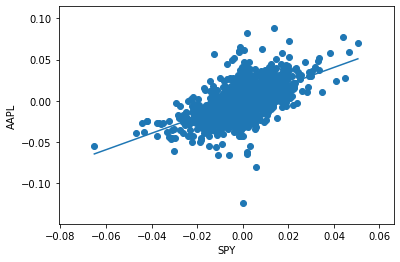

In [17]:
X_predict = np.linspace(X.min(), X.max(), 5).reshape(-1, 1)
Y_predict = model.predict(X_predict)

plt.scatter(X, Y);
plt.xlabel('SPY');
plt.ylabel('AAPL');
plt.plot(X_predict, Y_predict);

In [18]:
beta = model.coef_
alpha = model.intercept_
alpha, beta

(array([0.00046298]), array([[0.99836387]]))

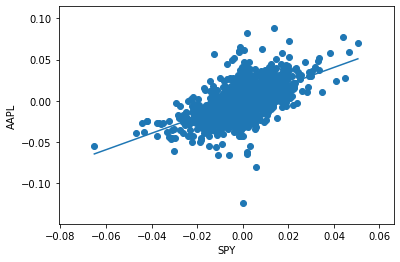

In [19]:
# Manual calculation
Y_predict = beta * X_predict + alpha

plt.scatter(X, Y);
plt.xlabel('SPY');
plt.ylabel('AAPL');
plt.plot(X_predict, Y_predict);

In [20]:
joined.head()

,AAPL,SPY
Date,,
2010-01-05,0.001729,0.002647
2010-01-06,-0.015906,0.000704
2010-01-07,-0.001849,0.004221
2010-01-08,0.006648,0.003328
2010-01-11,-0.008822,0.001397


In [21]:
joined.std()

AAPL    0.016201
SPY     0.009430
dtype: float64

In [22]:
joined['AAPL'].std() / joined['SPY'].std()

1.7179632360403778